In [1]:
import random

import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

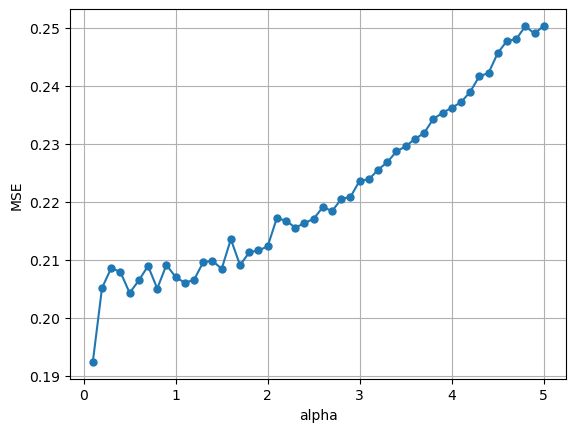

In [2]:
data = pd.read_csv('datasets/heart.csv')
y = data['target']
X = data.loc[:, 'age':'thal']

test_count = 10
n_alpha = 50
alpha_values = [5 * (1 - float(i / n_alpha)) for i in range(n_alpha)]

mse_dependence_test = Series(index=alpha_values, dtype=float)
for alpha in alpha_values:
    mean_mse_test = 0.
    for _ in range(test_count):
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random.randint(0, 1000))
        clf = linear_model.Lasso(alpha=alpha, positive=True)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        mean_mse_test += mean_squared_error(y_test, y_pred) / test_count
    mse_dependence_test[alpha] = mean_mse_test
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.plot(mse_dependence_test, label='test', marker='.', markersize=10)
plt.grid()
plt.show()

In [3]:
clf = linear_model.Lasso(alpha=0.001, positive=True)
clf.fit(X, y)
print(clf.sparse_coef_)

  (0, 2)	0.16010567487733762
  (0, 6)	0.08315937973271498
  (0, 7)	0.005210410675253298
  (0, 10)	0.15911767862892362
